# Location of POLARIS FROM MY HOME. 

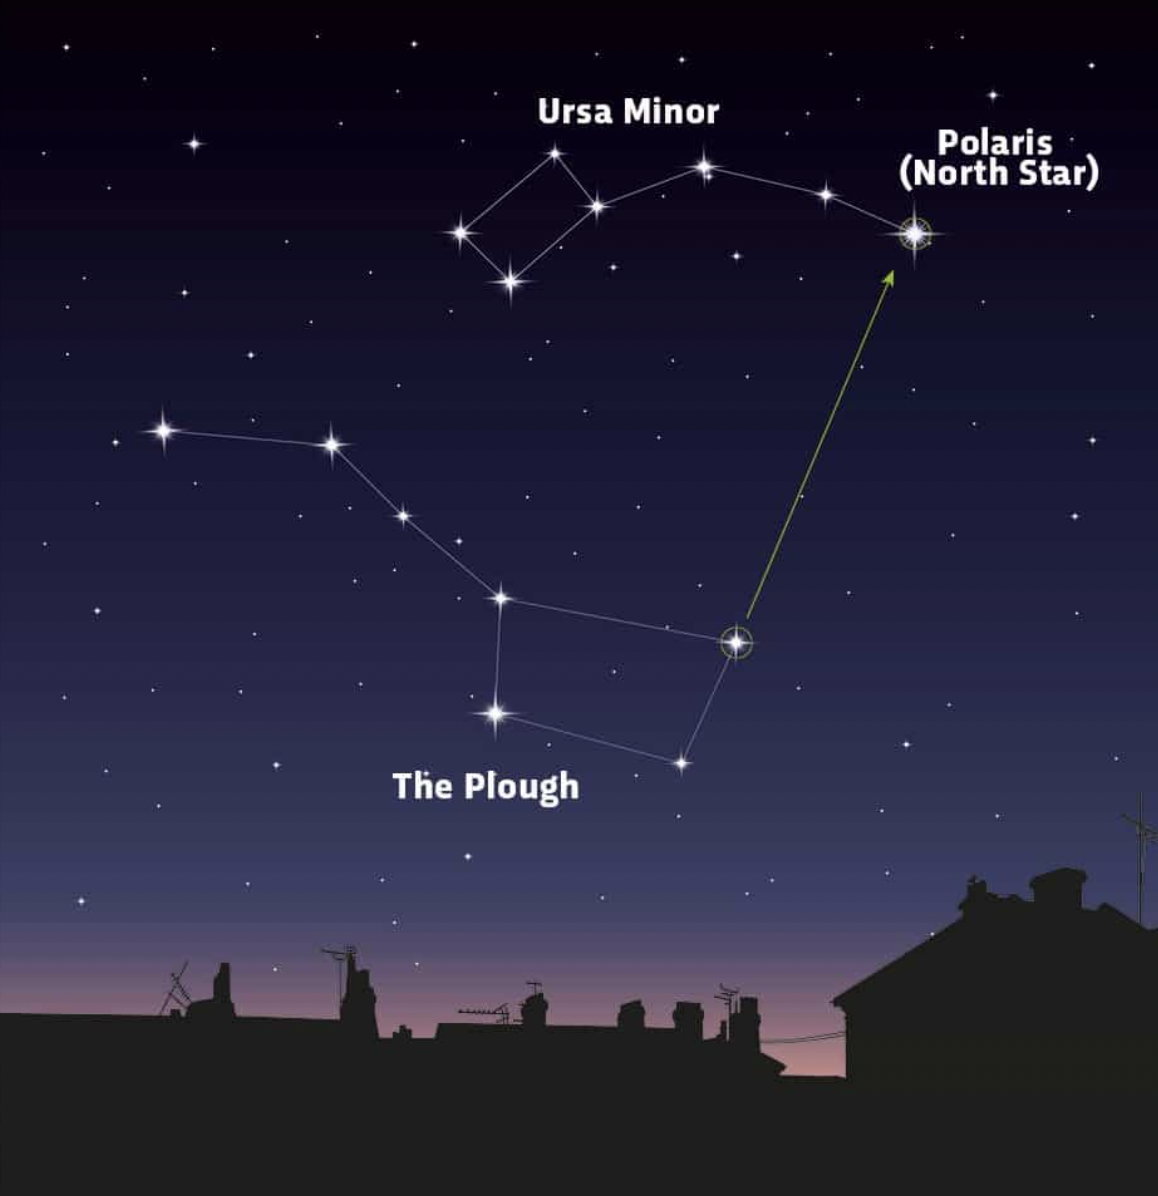

In [12]:
import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun

# geographical position of the observer
obs = EarthLocation(lat=30*u.deg+10*u.arcmin+21*u.arcsec,lon=77*u.deg+17*u.arcmin+58*u.arcsec)
# Jagadhri,Haryana, Indai LOcation of observer.

# get latitude
phi = obs.lat

__A coordinate or frame in the Altitude-Azimuth system (Horizontal coordinates) with respect to the WGS84 ellipsoid. Azimuth is oriented East of North (i.e., N=0, E=90 degrees). Altitude is also known as elevation angle, so this frame is also in the Azimuth-Elevation system.__

In [13]:
# Now adusting TIME According to INDIA +5:30
from astropy.time import Time

utc_shift = 11/2*u.hour # IST time zone (+5h 30min) # we are ahead
noon_ist = Time("2020-07-31 12:00:00") - utc_shift

In [14]:
import numpy as np

# time array covering next 24 hours in steps of 5 min
elapsed = np.arange(0, 24*60, 5)*u.min
time = noon_ist + elapsed

In [15]:
# sequence of horizontal frames
frame_local_24h = AltAz(obstime=time, location=obs)

In [16]:
# star we want to observe that is "DHRUV TARA" AKA "POLARIS"
polaris = SkyCoord.from_name('Polaris')
polaris_local = polaris.transform_to(frame_local_24h)

In [17]:
# time-dependent coordinates of the Sun in equatorial system
sun = get_sun(time)
sun_local = sun.transform_to(frame_local_24h)

This completes the preparation of the data.  
Now let us plot the altitude of Polaris and the Sun for the chosen time interval and location:

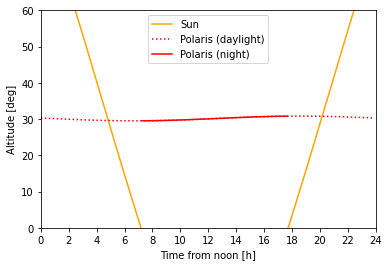

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

elapsed_night = elapsed[np.where(sun_local.alt < 0)]
polaris_night = polaris_local.alt[np.where(sun_local.alt < 0)]

plt.plot(elapsed.to(u.h), sun_local.alt,
color='orange', label='Sun')
plt.plot(elapsed.to(u.h), polaris_local.alt,color='red', linestyle=':',label='Polaris (daylight)')

plt.plot(elapsed_night.to(u.h), polaris_night,
color='red', label='Polaris (night)')

plt.xlabel('Time from noon [h]')
plt.xlim(0, 24)
plt.xticks(np.arange(13)*2)
plt.ylim(0, 60)
plt.ylabel('Altitude [deg]')
plt.legend(loc='upper center')
plt.savefig("Polaris_obs_window.pdf")

## IN THE SAME WAY WE CAN GET THIS DATA FOR OTHER's STARS AS WELL

In [19]:
# Rigel

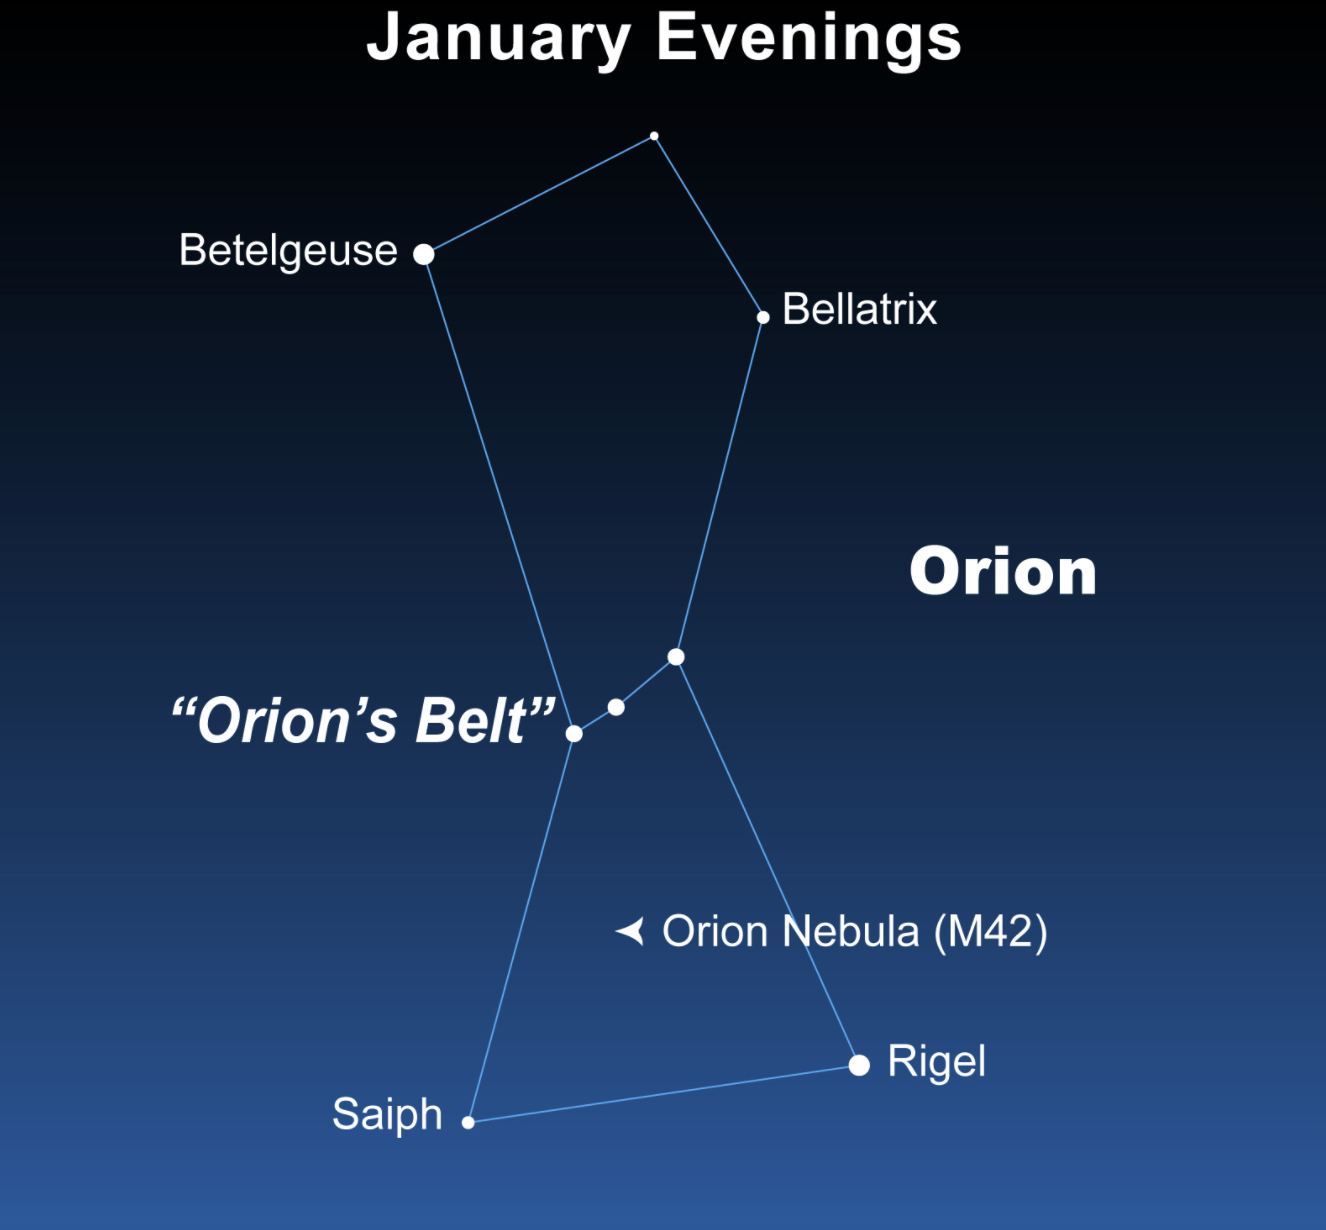

In [28]:
# star we want to observe that is "DHRUV TARA" AKA "POLARIS"
rigel = SkyCoord.from_name('Rigel')
rigel_local = rigel.transform_to(frame_local_24h)

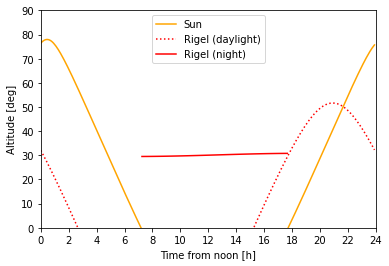

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

elapsed_night = elapsed[np.where(sun_local.alt < 0)]
rigel_night = rigel_local.alt[np.where(sun_local.alt < 0)]

plt.plot(elapsed.to(u.h), sun_local.alt,
color='orange', label='Sun')
plt.plot(elapsed.to(u.h), rigel_local.alt,color='red', linestyle=':',label='Rigel (daylight)')

plt.plot(elapsed_night.to(u.h), polaris_night,
color='red', label='Rigel (night)')

plt.xlabel('Time from noon [h]')
plt.xlim(0, 24)
plt.xticks(np.arange(13)*2)
plt.ylim(0, 90)
plt.ylabel('Altitude [deg]')
plt.legend(loc='upper center')
plt.savefig("Rigel_obs_window.pdf")